## K Nearest Neighbors with Python


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("pima-indians-diabetes.csv")

In [3]:
df.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
              "BMI","DiabetesPedigreeFunction","Age","Outcome"]

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
df_features = pd.DataFrame(df,columns=df.columns[:-1])
df_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30


#### train test split

In [7]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_features,df['Outcome'],
                                                    test_size=0.20,random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

### K-Nearest Neighbours

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
pred = knn.predict(X_test)

### Model Evaluation

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(confusion_matrix(y_test,pred))

[[80 21]
 [31 22]]


In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       101
           1       0.51      0.42      0.46        53

    accuracy                           0.66       154
   macro avg       0.62      0.60      0.61       154
weighted avg       0.65      0.66      0.65       154



 ### Finding the Right K value

In [21]:
error_rate = []
test_scores = []
train_scores = []

# Experimenting for 1-50 values of K
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


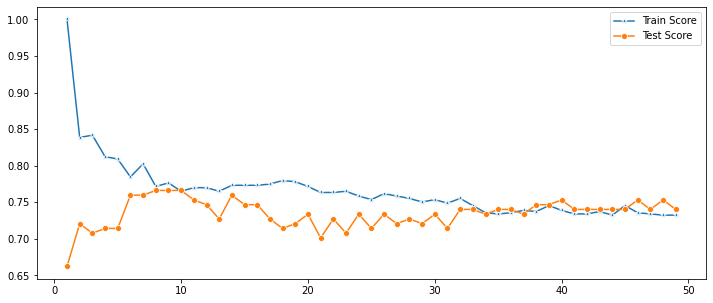

In [22]:
plt.figure(figsize=(12, 5))
p = sns.lineplot(range(1, 50), train_scores, marker = '*', label = 'Train Score');
p = sns.lineplot(range(1, 50), test_scores, marker = 'o', label = 'Test Score');

Text(0, 0.5, 'Error Rate')

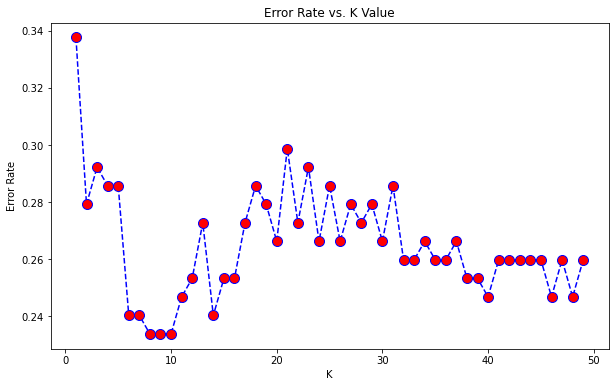

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#####  From the above figure - we can infer that when K>30, the error value is between 0.22-0.26 . 

In [25]:
# at K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('K=30')
print('\nConfusion Matrix')
print(confusion_matrix(y_test,pred))
print('\nClassification Report')
print(classification_report(y_test,pred))

K=30

Confusion Matrix
[[94  7]
 [34 19]]

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       101
           1       0.73      0.36      0.48        53

    accuracy                           0.73       154
   macro avg       0.73      0.64      0.65       154
weighted avg       0.73      0.73      0.70       154

